In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df=pd.DataFrame()

In [ ]:
df["Gün çıxma"]=list(pd.date_range("05:10", "08:00", freq="1min").time)[::-1]*30
df["Gün batma"]=list(pd.date_range("17:24", "20:14", freq="1min").time)*30

In [ ]:
df["Tarix"]=pd.date_range(start='1/1/2021', periods=df.shape[0], freq='H')

In [ ]:
hava = ['çiskin', 'yağışlı', 'günəşli', 'qarlı', 'duman']
df["Hava şəraiti"]=np.random.choice(hava, df.shape[0], p=[0.03, 0.1, 0.835, 0.03,0.005])

In [ ]:
df["Month"]=df["Tarix"].apply(lambda x: x.month)

In [ ]:
def find_season(month, hemisphere):
    if hemisphere == 'Southern':
        season_month_south = {
            12:'Summer', 1:'Summer', 2:'Summer',
            3:'Autumn', 4:'Autumn', 5:'Autumn',
            6:'Winter', 7:'Winter', 8:'Winter',
            9:'Spring', 10:'Spring', 11:'Spring'}
        return season_month_south.get(month)
        
    elif hemisphere == 'Northern':
        season_month_north = {
            12:'Qış', 1:'Qış', 2:'Qış',
            3:'Yaz', 4:'Yaz', 5:'Yaz',
            6:'Yay', 7:'Yay', 8:'Yay',
            9:'Payız', 10:'Payız', 11:'Payız'}
        return season_month_north.get(month)
    else:
        print('Invalid selection. Please select a hemisphere and try again')

In [ ]:
season_list = []
hemisphere = 'Northern'
for month in df['Month']:
    season = find_season(month, hemisphere)
    season_list.append(season)
    
df['Fəsil'] = season_list

In [ ]:
df["Panel sayı"]=np.random.randint(10, high=30, size=df.shape[0], dtype=int)
#df["Panel ölçüsü"]=np.random.randint(10, high=30, size=df.shape[0], dtype=int)
hava =[40,60,80,100,200,400]
df["Panel gücü"]=np.random.choice(hava, df.shape[0], p=[0.20, 0.20, 0.20, 0.20,0.1,0.1])

In [ ]:
df["Month"]=df["Tarix"].apply(lambda x: x.month)
df["Day"]=df["Tarix"].apply(lambda x: x.day)
df["Hour"]=df["Tarix"].apply(lambda x: x.hour)

In [ ]:
df["Gün çıxa saat"]=df["Gün çıxma"].apply(lambda x: x.hour)
df["Gün bata saat"]=df["Gün batma"].apply(lambda x: x.hour)

In [ ]:
df.head()

,Gün çıxma,Gün batma,Tarix,Hava şəraiti,Month,Fəsil,Panel sayı,Panel gücü,Day,Hour,Gün çıxa saat,Gün bata saat
0,08:00:00,17:24:00,2021-01-01 00:00:00,günəşli,1,Qış,25,40,1,0,8,17
1,07:59:00,17:25:00,2021-01-01 01:00:00,günəşli,1,Qış,11,100,1,1,7,17
2,07:58:00,17:26:00,2021-01-01 02:00:00,günəşli,1,Qış,24,100,1,2,7,17
3,07:57:00,17:27:00,2021-01-01 03:00:00,çiskin,1,Qış,25,40,1,3,7,17
4,07:56:00,17:28:00,2021-01-01 04:00:00,günəşli,1,Qış,26,400,1,4,7,17


In [ ]:
energy=pd.read_excel(r"/content/energy.xlsx")

In [ ]:
energy.columns

Index(['Month', 'Day', 'Hour', 'Beam Irradiance (W/m^2)',
       'Diffuse Irradiance (W/m^2)', 'Ambient Temperature (C)',
       'Wind Speed (m/s)', 'Plane of Array Irradiance (W/m^2)',
       'Cell Temperature (C)', 'DC Array Output (W)', 'AC System Output (W)'],
      dtype='object')

In [ ]:
data=df.merge(energy[['Month', 'Day', 'Hour', 'AC System Output (W)']], how="left", on=['Month', 'Day', 'Hour'])

In [ ]:
data.sample(1000)

,Gün çıxma,Gün batma,Tarix,Hava şəraiti,Month,Fəsil,Panel sayı,Panel gücü,Day,Hour,Gün çıxa saat,Gün bata saat,AC System Output (W)
4189,06:35:00,18:49:00,2021-06-24 13:00:00,günəşli,6,Yay,13,60,24,13,6,18,2132.507
2785,07:11:00,18:13:00,2021-04-27 01:00:00,yağışlı,4,Yaz,27,40,27,1,7,18,0.000
2453,07:01:00,18:23:00,2021-04-13 05:00:00,günəşli,4,Yaz,29,100,13,5,7,18,0.000
3332,06:37:00,18:47:00,2021-05-19 20:00:00,günəşli,5,Yaz,19,200,19,20,6,18,0.000
4065,05:48:00,19:36:00,2021-06-19 09:00:00,günəşli,6,Yay,11,80,19,9,5,19,2026.208
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,05:35:00,19:49:00,2021-06-27 01:00:00,günəşli,6,Yay,14,100,27,1,5,19,0.000
1831,05:59:00,19:25:00,2021-03-18 07:00:00,çiskin,3,Yaz,24,80,18,7,5,19,525.292
4007,06:46:00,18:38:00,2021-06-16 23:00:00,günəşli,6,Yay,19,200,16,23,6,18,0.000
2951,07:16:00,18:08:00,2021-05-03 23:00:00,günəşli,5,Yaz,27,80,3,23,7,18,0.000


In [ ]:
def energy(x,y,z):
  z= (z/4000)+0.00001
  n=np.log(x*y*z)
  if n<0:
    return 0 
  return n

In [ ]:
data["Günəş enerjisi"]= [energy(x,y,z) for x,y,z in zip(data["Panel sayı"], data["Panel gücü"], data["AC System Output (W)"])]

In [ ]:
data["Günəş enerjisi"].max()

8.783489116765878

In [ ]:
data.rename(columns={"Day":"Tarix_gün", "Hour":"Tarix_saat", "Month":"Tarix_ay"}, inplace=True)

In [ ]:
data.head()

,Gün çıxma,Gün batma,Tarix,Hava şəraiti,Tarix_ay,Fəsil,Panel sayı,Panel gücü,Tarix_gün,Tarix_saat,Gün çıxa saat,Gün bata saat,AC System Output (W),Günəş enerjisi
0,08:00:00,17:24:00,2021-01-01 00:00:00,günəşli,1,Qış,25,40,1,0,8,17,0.0,0.0
1,07:59:00,17:25:00,2021-01-01 01:00:00,günəşli,1,Qış,11,100,1,1,7,17,0.0,0.0
2,07:58:00,17:26:00,2021-01-01 02:00:00,günəşli,1,Qış,24,100,1,2,7,17,0.0,0.0
3,07:57:00,17:27:00,2021-01-01 03:00:00,çiskin,1,Qış,25,40,1,3,7,17,0.0,0.0
4,07:56:00,17:28:00,2021-01-01 04:00:00,günəşli,1,Qış,26,400,1,4,7,17,0.0,0.0


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data["Hava şəraiti"])

data["Hava şəraiti"]=le.transform(data["Hava şəraiti"])

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data["Fəsil"])

data["Fəsil"]=le.transform(data["Fəsil"])

In [ ]:
data_final=data[['Hava şəraiti', 'Tarix_ay', 'Fəsil',
       'Panel sayı', 'Panel gücü', 'Tarix_gün', 'Tarix_saat', 'Gün çıxa saat',
       'Gün bata saat', 'Günəş enerjisi']]

In [ ]:
data_final.head()

,Hava şəraiti,Tarix_ay,Fəsil,Panel sayı,Panel gücü,Tarix_gün,Tarix_saat,Gün çıxa saat,Gün bata saat,Günəş enerjisi
0,1,1,0,25,40,1,0,8,17,0.0
1,1,1,0,11,100,1,1,7,17,0.0
2,1,1,0,24,100,1,2,7,17,0.0
3,4,1,0,25,40,1,3,7,17,0.0
4,1,1,0,26,400,1,4,7,17,0.0


In [ ]:
# Loading Libraries

import pandas as pd

import numpy as np

from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_log_error,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

import datetime

from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression

from xgboost import XGBRegressor

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

import seaborn as sns

from keras.models import Sequential

from keras.layers import Dense

from prettytable import PrettyTable

In [ ]:
data_final.head()

,Hava şəraiti,Tarix_ay,Fəsil,Panel sayı,Panel gücü,Tarix_gün,Tarix_saat,Gün çıxa saat,Gün bata saat,Günəş enerjisi
0,1,1,0,25,40,1,0,8,17,0.0
1,1,1,0,11,100,1,1,7,17,0.0
2,1,1,0,24,100,1,2,7,17,0.0
3,4,1,0,25,40,1,3,7,17,0.0
4,1,1,0,26,400,1,4,7,17,0.0


In [ ]:
df=data_final.copy()
X=data_final.drop(["Günəş enerjisi"],axis=1)

y=data_final['Günəş enerjisi']

# Data Splitting and Scaling

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=25)

scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)

X_test_scaled=scaler.transform(X_test)

# Model Building

def train_ml_model(x,y,model_type):

    if model_type=='lr':

        model=LinearRegression()

    elif model_type=='xgb':

        model=XGBRegressor()

    elif model_type=='rf':

        model=RandomForestRegressor()

    model.fit(x,y)#np.log(y))

    return model

def model_evaluate(model,x,y):

    predictions=model.predict(x)

    #predictions=np.exp(predictions)

    mse=mean_squared_error(y,predictions)

    mae=mean_absolute_error(y,predictions)

    mape=mean_absolute_percentage_error(y,predictions)

    msle=mean_squared_log_error(y,predictions)

    mse=round(mse,2)

    mae=round(mae,2)

    mape=round(mape,2)

    msle=round(msle,2)

    return [mse,mae,mape,msle]

model_lr=train_ml_model(X_train_scaled,y_train,'lr')

model_xgb=train_ml_model(X_train_scaled,y_train,'xgb')

model_rf=train_ml_model(X_train_scaled,y_train,'rf')

## Deep Learning



[11:43:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
### Small Network

model_dl_small=Sequential()

model_dl_small.add(Dense(16,input_dim=X_train_scaled.shape[1],activation='relu'))

model_dl_small.add(Dense(8,activation='relu'))

model_dl_small.add(Dense(4,activation='relu'))

model_dl_small.add(Dense(1,activation='linear'))

model_dl_small.compile(loss='mean_squared_error',optimizer='adam')

model_dl_small.summary()

epochs=10

batch_size=10

model_dl_small.fit(X_train_scaled,y_train,verbose=1,validation_data=(X_test_scaled,y_test),epochs=epochs,batch_size=batch_size)

#plot the loss and validation loss of the dataset

history_df = pd.DataFrame(model_dl_small.history.history)



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                160       
                                                                 
 dense_25 (Dense)            (None, 8)                 136       
                                                                 
 dense_26 (Dense)            (None, 4)                 36        
                                                                 
 dense_27 (Dense)            (None, 1)                 5         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
411/411 [==============================] - 3s 4ms/step - loss: 12.1241 - val_loss: 9.1259
Epoch 2/10
411/411 [==============================] - 1s 3ms/step - loss: 8.2289 - val_

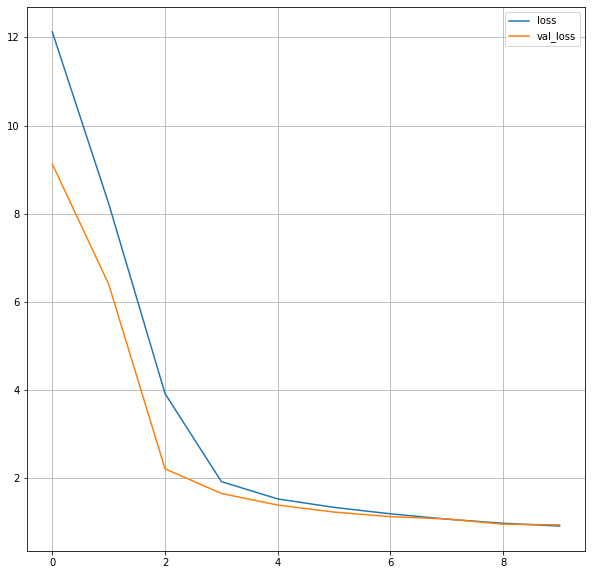

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(history_df['loss'], label='loss')

plt.plot(history_df['val_loss'], label='val_loss')

#plt.xticks(np.arange(1,epochs+1))

#plt.yticks(np.arange(1,max(history_df['loss']),0.5))

plt.legend()

plt.grid()

plt.show()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 64)                640       
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dense_30 (Dense)            (None, 16)                528       
                                                                 
 dense_31 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,265
Trainable params: 3,265
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
411/411 [==============================] - 2s 4ms/step - loss: 8.1176 - val_loss: 2.7456
Epoch 2/10
411/411 [==============================] - 1s 3ms/step - loss: 1.9341 - v

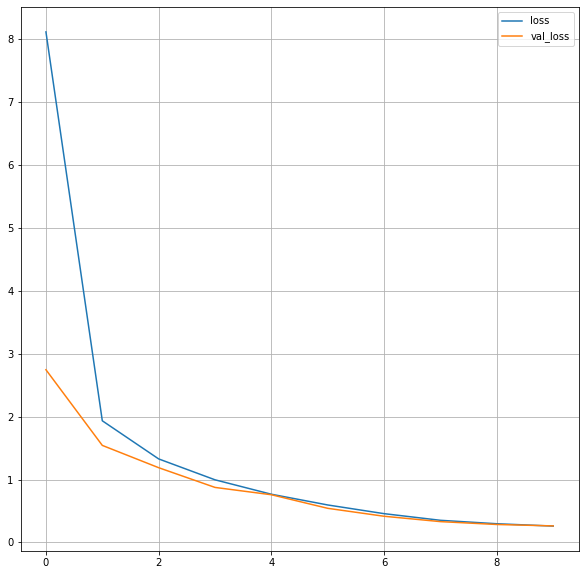

In [ ]:
### Large Network

model_dl_large=Sequential()

model_dl_large.add(Dense(64,input_dim=X_train_scaled.shape[1],activation='relu'))

model_dl_large.add(Dense(32,activation='relu'))

model_dl_large.add(Dense(16,activation='relu'))

model_dl_large.add(Dense(1,activation='linear'))

model_dl_large.compile(loss='mean_squared_error',optimizer='adam')

model_dl_large.summary()

epochs=10

batch_size=10

model_dl_large.fit(X_train_scaled,y_train,verbose=1,validation_data=(X_test_scaled,y_test),epochs=epochs,batch_size=batch_size)

#plot the loss and validation loss of the dataset

history_df = pd.DataFrame(model_dl_large.history.history)

plt.figure(figsize=(10,10))

plt.plot(history_df['loss'], label='loss')

plt.plot(history_df['val_loss'], label='val_loss')

#plt.xticks(np.arange(1,epochs+1,2))

#plt.yticks(np.arange(1,max(history_df['loss']),0.5))

plt.legend()

plt.grid()

In [ ]:
min(y_test)

0.0

In [ ]:
model_evaluate(model_lr,X_test_scaled,y_test)

[8.97, 2.88, 6313993878452221.0, 1.05]

In [ ]:
y_pred=model_xgb.predict(X_test_scaled)

In [ ]:
min(y_pred)

-0.52626586

+-------+------+------+--------------------+------+
| Model | MSE  | MAE  |        MAPE        | MSLE |
+-------+------+------+--------------------+------+
|   LR  | 8.97 | 2.88 | 6313993878452221.0 | 1.05 |
|   RF  | 0.02 | 0.07 |  5710213104769.12  | 0.0  |
+-------+------+------+--------------------+------+


([<matplotlib.axis.XTick at 0x7f792c348410>,
 <a list of 20 Text major ticklabel objects>)

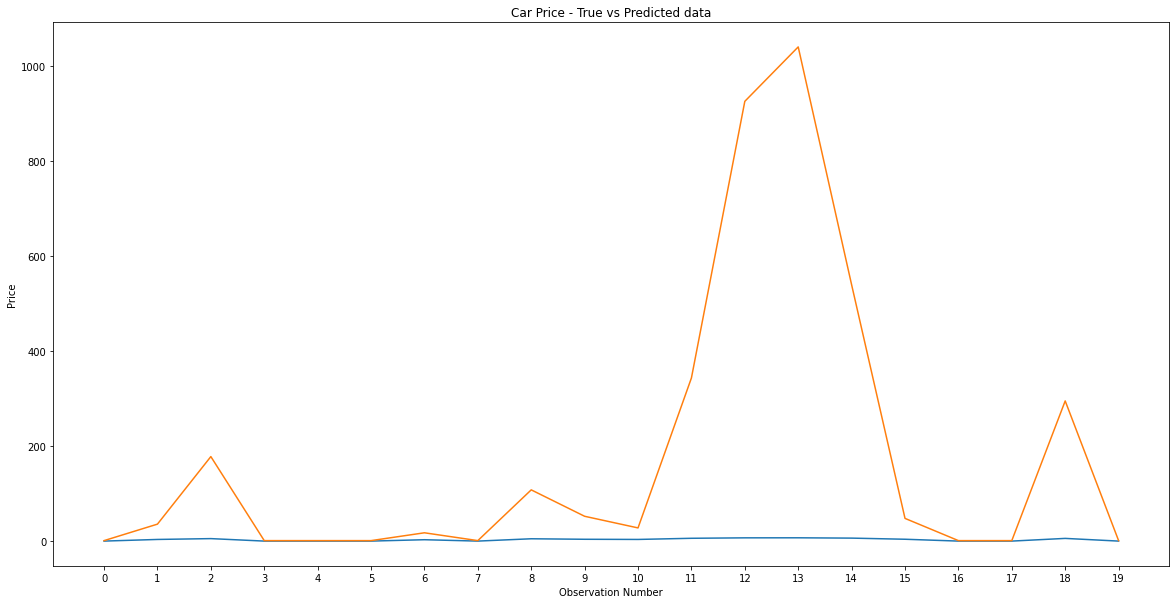

In [ ]:


summary=PrettyTable(['Model','MSE','MAE','MAPE','MSLE'])

summary.add_row(['LR']+model_evaluate(model_lr,X_test_scaled,y_test))

#summary.add_row(['XGB']+model_evaluate(model_xgb,X_test_scaled,y_test))

summary.add_row(['RF']+model_evaluate(model_rf,X_test_scaled,y_test))

#summary.add_row(['DL_SMALL']+model_evaluate(model_dl_small,X_test_scaled,y_test))

#summary.add_row(['DL_LARGE']+model_evaluate(model_dl_large,X_test_scaled,y_test))

print(summary)

y_pred=np.exp(model_rf.predict(X_test_scaled))

number_of_observations=20

x_ax = range(len(y_test[:number_of_observations]))

plt.figure(figsize=(20,10))

plt.plot(x_ax, y_test[:number_of_observations], label="True")

plt.plot(x_ax, y_pred[:number_of_observations], label="Predicted")

plt.title("Car Price - True vs Predicted data")

plt.xlabel('Observation Number')

plt.ylabel('Price')

plt.xticks(np.arange(number_of_observations))


In [ ]:
 dataset[0:train_size,:]

,Hava şəraiti,Tarix_ay,Fəsil,Panel sayı,Panel gücü,Tarix_gün,Tarix_saat,Gün çıxa saat,Gün bata saat,Günəş enerjisi
0,0.25,0.0,0.0,0.789474,0.000000,0.000000,0.000000,1.000000,0.0,0.000000
1,0.25,0.0,0.0,0.052632,0.166667,0.000000,0.043478,0.666667,0.0,0.000000
2,0.25,0.0,0.0,0.736842,0.166667,0.000000,0.086957,0.666667,0.0,0.000000
3,1.00,0.0,0.0,0.789474,0.000000,0.000000,0.130435,0.666667,0.0,0.000000
4,0.25,0.0,0.0,0.842105,1.000000,0.000000,0.173913,0.666667,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
5125,0.25,1.0,0.5,0.473684,0.166667,0.033333,0.565217,0.000000,1.0,6.746398
5126,0.25,1.0,0.5,0.000000,0.000000,0.033333,0.608696,0.000000,1.0,5.020667
5127,0.25,1.0,0.5,0.000000,0.166667,0.033333,0.652174,0.000000,1.0,5.668072
5128,0.25,1.0,0.5,0.894737,0.111111,0.033333,0.695652,0.000000,1.0,6.012536


In [ ]:
# Stacked LSTM for international airline passengers problem with memory
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset.iloc[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset.iloc[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
#dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset=data_final.copy()
#dataset = dataframe.values
#dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset.iloc[:, :-1] = scaler.fit_transform(dataset.iloc[:, :-1])
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset.iloc[0:train_size,:], dataset.iloc[train_size:len(dataset),:]

In [ ]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(5):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()

3433/3433 - 14s - loss: 0.0375 - 14s/epoch - 4ms/step
3433/3433 - 12s - loss: 0.0362 - 12s/epoch - 4ms/step
3433/3433 - 12s - loss: 0.0361 - 12s/epoch - 4ms/step
3433/3433 - 12s - loss: 0.0361 - 12s/epoch - 3ms/step
3433/3433 - 12s - loss: 0.0360 - 12s/epoch - 3ms/step


In [ ]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [ ]:
target_y=data_final["Günəş enerjisi"]
X_feat=data_final.iloc[:, :-1]

In [ ]:
sc=StandardScaler()
X_ft=sc.fit_transform(X_feat.values)
X_ft=pd.DataFrame(columns=X_feat.columns,
                  data=X_ft, index=X_feat.index)

In [ ]:
def lstm_split(data, n_steps):
  X,y =[], []
  for i in range(len(data)-n_steps+1):
    X.append(data[i:i+n_steps, :-1])
    y.append(data[i+n_steps-1,-1])
  return np.array(X), np.array(y)

In [ ]:
X1, y1=lstm_split(data_final.values, n_steps=1)

In [ ]:
train_split=0.8
split_idx=int(np.ceil(len(X1)*train_split))
data_index=data_final.index

In [ ]:
X_train, X_test=X1[:split_idx], X1[split_idx:]
y_train, y_test=y1[:split_idx], y1[split_idx:]

In [ ]:
X_train_date, X_test_date=data_index[:split_idx], data_index[split_idx:]
print(X1.shape, X_train.shape, X_test.shape, y_test.shape)

(5130, 1, 9) (4104, 1, 9) (1026, 1, 9) (1026,)


In [ ]:
lstm=Sequential()
lstm.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 1, 32)             5376      
                                                                 
 dense_35 (Dense)            (None, 1, 1)              33        
                                                                 
Total params: 5,409
Trainable params: 5,409
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train.shape

(4104,)

In [ ]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

In [ ]:
y_train

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [ ]:
history=lstm.fit(X_train, y_train, epochs=10, batch_size=4, verbose=1,shuffle=False)

Epoch 1/10
1026/1026 [==============================] - 4s 3ms/step - loss: 7.6284
Epoch 2/10
1026/1026 [==============================] - 3s 3ms/step - loss: 4.2377
Epoch 3/10
1026/1026 [==============================] - 3s 3ms/step - loss: 3.5200
Epoch 4/10
1026/1026 [==============================] - 3s 3ms/step - loss: 3.1577
Epoch 5/10
1026/1026 [==============================] - 3s 3ms/step - loss: 3.0536
Epoch 6/10
1026/1026 [==============================] - 3s 3ms/step - loss: 2.9872
Epoch 7/10
1026/1026 [==============================] - 3s 3ms/step - loss: 2.9523
Epoch 8/10
1026/1026 [==============================] - 3s 3ms/step - loss: 2.9215
Epoch 9/10
1026/1026 [==============================] - 3s 3ms/step - loss: 2.8888
Epoch 10/10
1026/1026 [==============================] - 3s 3ms/step - loss: 2.8682


In [ ]:
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [ ]:
y_pred=lstm.predict(X_train)
y_pred2=lstm.predict(X_test)

In [ ]:
y_test

array([0.       , 0.       , 0.       , ..., 5.6680717, 6.012536 ,
       5.0901155], dtype=float32)

In [ ]:
y_pred[:,0][:, 0]

array([-0.23825541, -0.08235756,  0.5287961 , ...,  6.1170897 ,
        5.7208724 ,  4.721501  ], dtype=float32)

In [ ]:
rmse=mean_squared_error(y_test, y_pred[:,0][:, 0], squared=False)

In [ ]:
range1

[0,
 30,
 60,
 90,
 120,
 150,
 180,
 210,
 240,
 270,
 300,
 330,
 360,
 390,
 420,
 450,
 480,
 510,
 540,
 570,
 600,
 630,
 660,
 690,
 720,
 750,
 780,
 810,
 840,
 870,
 900,
 930,
 960,
 990,
 1020,
 1050,
 1080,
 1110,
 1140,
 1170,
 1200,
 1230,
 1260,
 1290,
 1320,
 1350,
 1380,
 1410,
 1440,
 1470,
 1500,
 1530,
 1560,
 1590,
 1620,
 1650,
 1680,
 1710,
 1740,
 1770,
 1800,
 1830,
 1860,
 1890,
 1920,
 1950,
 1980,
 2010,
 2040,
 2070,
 2100,
 2130,
 2160,
 2190,
 2220,
 2250,
 2280,
 2310,
 2340,
 2370,
 2400,
 2430,
 2460,
 2490,
 2520,
 2550,
 2580,
 2610,
 2640,
 2670,
 2700,
 2730,
 2760,
 2790,
 2820,
 2850,
 2880,
 2910,
 2940,
 2970,
 3000,
 3030,
 3060,
 3090,
 3120,
 3150,
 3180,
 3210,
 3240,
 3270,
 3300,
 3330,
 3360,
 3390,
 3420,
 3450,
 3480,
 3510,
 3540,
 3570,
 3600,
 3630,
 3660,
 3690,
 3720,
 3750,
 3780,
 3810,
 3840,
 3870,
 3900,
 3930,
 3960,
 3990,
 4020,
 4050,
 4080]

In [ ]:
data_final2=data.iloc[:split_idx,:]
data_final3=data.iloc[split_idx:,:]

In [ ]:
data_final2["prediction"]= y_pred[:,0][:, 0]
data_final3["prediction"]= y_pred2[:,0][:, 0]

In [ ]:
range1=[i for i in range(0,data_final2.shape[0],120)] 
range2=[i for i in range(0,data_final3.shape[0],120)]

In [ ]:
data_final2=data_final2.iloc[range1,:]
data_final3=data_final3.iloc[range2,:]

In [ ]:
data_final2.head()

,Gün çıxma,Gün batma,Tarix,Hava şəraiti,Tarix_ay,Fəsil,Panel sayı,Panel gücü,Tarix_gün,Tarix_saat,Gün çıxa saat,Gün bata saat,AC System Output (W),Günəş enerjisi,prediction
0,08:00:00,17:24:00,2021-01-01,1,1,0,25,40,1,0,8,17,0.0,0.0,0.123109
120,06:00:00,19:24:00,2021-01-06,1,1,0,25,100,6,0,6,19,0.0,0.0,-0.067486
240,06:51:00,18:33:00,2021-01-11,3,1,0,13,60,11,0,6,18,0.0,0.0,0.092407
360,07:42:00,17:42:00,2021-01-16,1,1,0,21,80,16,0,7,17,0.0,0.0,-0.111245
480,05:42:00,19:42:00,2021-01-21,1,1,0,21,40,21,0,5,19,0.0,0.0,0.165544


In [ ]:
data_final2=data_final2[["Tarix","prediction" ]]
data_final2.index=data_final2["Tarix"]
data_final2.drop(columns=["Tarix"], inplace=True)

data_final3=data_final3[["Tarix","prediction" ]]
data_final3.index=data_final3["Tarix"]
data_final3.drop(columns=["Tarix"], inplace=True)

In [ ]:
data_final2.head()

,prediction
Tarix,
2021-01-01,0.123109
2021-01-06,-0.067486
2021-01-11,0.092407
2021-01-16,-0.111245
2021-01-21,0.165544


In [ ]:
X_train.shape

(4104, 1, 9)

In [ ]:
split_idx

4104

In [ ]:
import pandas as pd 
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

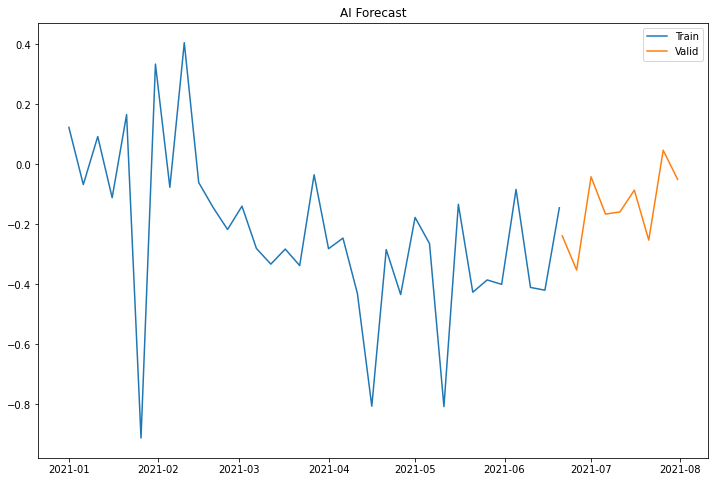

In [ ]:
#dd= np.asarray(Train.Count) 
#y_hat = valid.copy() 
#y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(data_final2.index, data_final2['prediction'], label='Train') 
plt.plot(data_final3.index,data_final3['prediction'], label='Valid') 
#plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("AI Forecast") 
plt.show()